In [36]:

import copy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker as mticker
from synthesizer.grid import Grid
import cmasher as cmr
from unyt import kg, Angstrom, c, h, eV

# set style
plt.style.use('../matplotlibrc.txt')



In [37]:



disc_model = 'qsosed'
parameters = ['mass', 'accretion_rate_eddington']
default_model_index = [2, -1]


grid_name = f'{disc_model}-isotropic-limited'
grid_dir = '/Users/sw376/Dropbox/Research/data/synthesizer/grids'
grid = Grid(grid_dir=grid_dir, grid_name=grid_name, read_lines=False)

parameter_labels = {
    'mass': r'\log_{10}(M_{\bullet}/M_{\odot})',
    'accretion_rate_eddington': r'\log_{10}(\lambda_{Edd})',
}

parameter_cmaps = {
    'mass': 'cmr.ember',
    'accretion_rate_eddington': 'cmr.cosmic',
}


left = 0.15
right = 0.975
bottom = 0.075
top = 0.95
figsize = (3.5, 5.)


## Full spectra

911.648479060269 Å
911.648479060269 Å


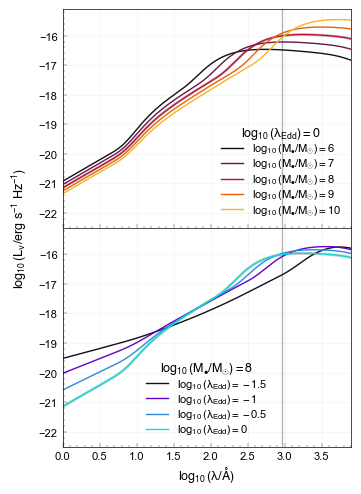

In [38]:

wavelength_limits = [0., 3.9]
frequency_limits = np.log10((c/(10**np.array(wavelength_limits) * Angstrom)).to('Hz').value)
# luminosity_limits = [-5.5, 5.5]
luminosity_limits = [-22.5, -15.1]

fig = plt.figure(figsize=figsize)

gs = fig.add_gridspec(
    len(parameters),
    1,
    hspace=0,
    wspace=0,
    left=left,
    right=right,
    bottom=bottom,
    top=top,)

axes = gs.subplots()

for ax in axes:
    ax.set_xlim(wavelength_limits)
    ax.set_ylim(luminosity_limits)

# for ax in axes[1:]:
#     ax.set_yticklabels([])

axes[0].set_xticklabels([])

default_model = grid.get_spectra(tuple(default_model_index), spectra_id='incident')

# add HI ionising photons
for i, (ax, parameter) in enumerate(zip(axes, parameters)):

    energy = 13.6 * eV
    nu = energy / h
    lam = c / nu
    print(lam.to('Angstrom'))
    ax.axvline(np.log10(lam.to('Angstrom').value), lw=1, alpha=0.3, c='k')



for i, (ax, parameter) in enumerate(zip(axes, parameters)):

    # plot default model
    ax.plot(np.log10(default_model.lam), np.log10(default_model.lnu), lw=2, c='k', alpha=0.2)

    parameter_values = getattr(grid, parameter)

    colours = cmr.take_cmap_colors(parameter_cmaps[parameter], len(parameter_values), cmap_range=(0.1, 0.9))

    for j, parameter_value in enumerate(parameter_values):

        parameter_value = np.log10((parameter_value))

        model_index = copy.deepcopy(default_model_index)
        model_index[i] = j

        label = rf'$ {parameter_labels[parameter]}={parameter_value:.3g}$'

        model = grid.get_spectra(tuple(model_index), spectra_id='incident')
        
        ax.plot(np.log10(model.lam), np.log10(model.lnu), lw=1, c=colours[j], alpha=1.0, label=label)

    if i == (len(parameters) - 1):
        j = 0
    else:
        j = i + 1
    fixed_parameter_value = getattr(grid, parameters[j])[default_model_index[j]]
    fixed_parameter_title = f'${parameter_labels[parameters[j]]}={np.log10(fixed_parameter_value):.3g}$'
    
    ax.legend(fontsize=8, labelspacing=0.1, title=fixed_parameter_title)


    # ax2 = ax.twiny()
    # ax2.set_xlim(wavelength_limits)
    # ax2.set_xlabel((r'$\rm \log_{10}(\lambda/\AA)$'))
    # ax.set_xlabel(r'$\rm \log_{10}(\nu/Hz)$')

# add default model to top of the plot

# default_model_label = r''
# for i, parameter in enumerate(parameters):
#     default_parameter_value = getattr(grid, parameter)[default_model_index[i]]
#     if parameter == 'mass':
#         default_parameter_value = default_parameter_value * kg
#         default_parameter_value = np.log10((default_parameter_value.to('Msun').value))
#     default_model_label += rf'{parameter_labels[parameter]}={default_parameter_value:.3g}\ \ '

# fig.text((left+right)/2, top+0.02, rf'${default_model_label}$', ha='center', va='center', fontsize=9)

fig.supylabel(r'$\rm \log_{10}(L_{\nu}/erg\ s^{-1}\ Hz^{-1})$', x=0.0, y=0.5*(top+bottom), fontsize=9)
# fig.supxlabel(r'$\rm \log_{10}(\lambda/\AA)$', x=0.5*(left+right), y=top+0.1, fontsize=8)
fig.supxlabel(r'$\rm \log_{10}(\lambda/\AA)$', x=0.5*(left+right), y=0.0, fontsize=9)

fig.savefig(f'figures/{disc_model}_spectra.pdf')
plt.show()
fig.clf()

## Full spectra - energy units

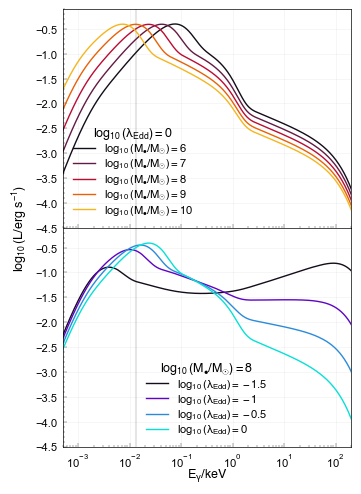

In [47]:

energy_limits = [0.0005, 200.]
luminosity_limits = [-4.5, -0.1]


fig = plt.figure(figsize=figsize)

gs = fig.add_gridspec(
    len(parameters),
    1,
    hspace=0,
    wspace=0,
    left=left,
    right=right,
    bottom=bottom,
    top=top,)

axes = gs.subplots()

for ax in axes:
    ax.set_xlim(energy_limits)
    ax.set_ylim(luminosity_limits)

axes[0].set_xticklabels([])

default_model = grid.get_spectra(tuple(default_model_index), spectra_id='incident')

energy = (default_model.nu * h).to('keV').value



for i, (ax, parameter) in enumerate(zip(axes, parameters)):

    # mark HI ionising photons
    ax.axvline(13.6E-3, c='k', alpha=0.1)

    # plot default model
    # ax.plot(energy, np.log10(default_model.luminosity), lw=2, c='k', alpha=0.2)

    parameter_values = getattr(grid, parameter)

    colours = cmr.take_cmap_colors(parameter_cmaps[parameter], len(parameter_values), cmap_range=(0.1, 0.9))

    for j, parameter_value in enumerate(parameter_values):

        parameter_value = np.log10((parameter_value))

        model_index = copy.deepcopy(default_model_index)
        model_index[i] = j

        label = rf'$ {parameter_labels[parameter]}={parameter_value:.3g}$'

        model = grid.get_spectra(tuple(model_index), spectra_id='incident')
        
        ax.plot(energy, np.log10(model.luminosity), lw=1, c=colours[j], alpha=1.0, label=label)

    if i == (len(parameters) - 1):
        j = 0
    else:
        j = i + 1
    fixed_parameter_value = getattr(grid, parameters[j])[default_model_index[j]]
    fixed_parameter_title = f'${parameter_labels[parameters[j]]}={np.log10(fixed_parameter_value):.3g}$'

    ax.legend(fontsize=8, labelspacing=0.1, title=fixed_parameter_title)

    ax.set_xscale('log')

# default_model_label = r''
# for i, parameter in enumerate(parameters):
#     default_parameter_value = getattr(grid, parameter)[default_model_index[i]]
#     if parameter == 'mass':
#         default_parameter_value = default_parameter_value * kg
#         default_parameter_value = np.log10((default_parameter_value.to('Msun').value))
#     default_model_label += rf'{parameter_labels[parameter]}={default_parameter_value:.3g}\ \ '

# fig.text((left+right)/2, top+0.02, rf'${default_model_label}$', ha='center', va='center', fontsize=9)

fig.supylabel(r'$\rm \log_{10}(L/erg\ s^{-1})$', x=0.0, y=0.5*(top+bottom), fontsize=9)
fig.supxlabel(r'$\rm E_{\gamma}/keV$', x=0.5*(left+right), y=0.0, fontsize=9)

fig.savefig(f'figures/{disc_model}_spectra-energy.pdf')
plt.show()
fig.clf()

## Ionising spectra

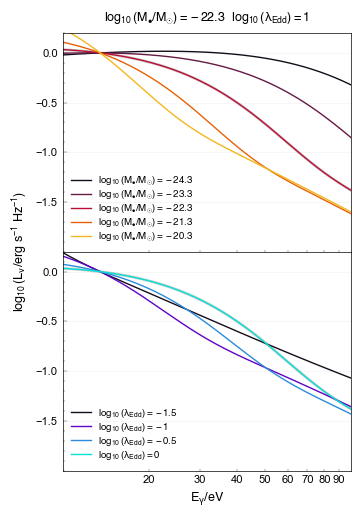

In [40]:
# wavelength_limits = [2.99, -2.99]
# frequency_limits = np.log10((c/(10**np.array(wavelength_limits) * Angstrom)).to('Hz').value)
luminosity_limits = [-2., 0.2]


energy_limits = [10.1, 99] # eV
# energy_limits = np.log10(np.array([10.1, 99])) # eV

fig = plt.figure(figsize=figsize)

gs = fig.add_gridspec(
    len(parameters),
    1,
    hspace=0,
    wspace=0,
    left=left,
    right=right,
    bottom=bottom,
    top=top,)

axes = gs.subplots()

for ax in axes:
    ax.set_xlim(energy_limits)
    ax.set_ylim(luminosity_limits)

axes[0].set_xticklabels([])

default_model = grid.get_spectra(tuple(default_model_index), spectra_id='incident')

# get photon energy
energy = (default_model.nu * h).to('eV').value

for i, (ax, parameter) in enumerate(zip(axes, parameters)):

    normalisation = np.interp(13.6, energy[::-1], default_model.lnu[::-1])
     
    # plot default model
    ax.plot(energy, np.log10(default_model.lnu / normalisation), lw=2, c='k', alpha=0.2)

    parameter_values = getattr(grid, parameter)

    colours = cmr.take_cmap_colors(parameter_cmaps[parameter], len(parameter_values), cmap_range=(0.1, 0.9))

    for j, parameter_value in enumerate(parameter_values):

        if parameter == 'mass':
            parameter_value = (parameter_value * kg).to('Msun').value

        parameter_value = np.log10((parameter_value))

        model_index = copy.deepcopy(default_model_index)
        model_index[i] = j

        label = rf'$ {parameter_labels[parameter]}={parameter_value:.3g}$'

        model = grid.get_spectra(tuple(model_index), spectra_id='incident')
        
        normalisation = np.interp(13.6, energy[::-1], model.lnu[::-1])

        ax.plot(energy, np.log10(model.lnu/normalisation), lw=1, c=colours[j], alpha=1.0, label=label)

    ax.legend(fontsize=7, labelspacing=0.1)
    ax.set_xscale('log')
    ax.set_yticks([-1.5, -1.0, -0.5, 0.0])
    # ax.set_xticks([10, 20, 30, 40, 50, 60, 70, 80, 90])
    ax.xaxis.set_minor_formatter(mticker.ScalarFormatter())
    
    # ax.set_xlabel(r'$\rm E_{\gamma}/eV$')

# add default model to top of the plot

default_model_label = r''
for i, parameter in enumerate(parameters):
    default_parameter_value = getattr(grid, parameter)[default_model_index[i]]
    if parameter == 'mass':
        default_parameter_value = default_parameter_value * kg
        default_parameter_value = np.log10((default_parameter_value.to('Msun').value))
    default_model_label += rf'{parameter_labels[parameter]}={default_parameter_value:.3g}\ \ '

fig.text((left+right)/2, top+0.03, rf'${default_model_label}$', ha='center', va='center', fontsize=9)

fig.supylabel(r'$\rm \log_{10}(L_{\nu}/erg\ s^{-1}\ Hz^{-1})$', x=0.0, y=0.5*(top+bottom), fontsize=9)
fig.supxlabel(r'$\rm E_{\gamma}/eV$', x=0.5*(left+right), y=0.0, fontsize=9)

fig.savefig(f'figures/{disc_model}_ionising_spectra.pdf')
plt.show()
fig.clf()